# 분류모델 간단 정리

## 분류 평가 지표

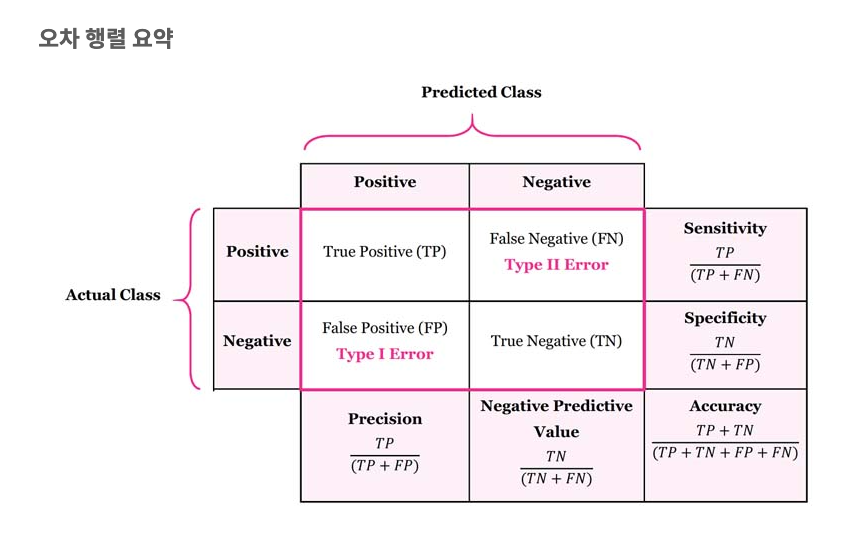

https://koreapy.tistory.com/158

* 정확도: 실제 데이터가 예측 데이터와 얼마나 같은지를 판단하는 지표
* 정밀도: 예측을 positive로 한 대상 중 실제 positive로 로 일치한 데이터 비율
* 재현율: 실제 값이 positive인 대상 중 예측을 positive로 일치한 데이터 비율
* 정밀도/재현율의 트레이드오프: 재현율이 높아지면 정밀도는 낮아지고 재현율이 높아지면 정밀도는 높아짐
* F1스코어: 정밀도와 재현율을 이용한 지표- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값
* ROC곡선: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
* AUC: ROC곡선 아래의 면적

## 앙상블

여러 개의 분류기를 생성하고 그 예측 결과를 결합함으로써 보다 정확한 최종 예측 값 도출

* 보팅: 서로 다른 알고리즘을 가진 분류기가 예측한 값을 투표를 통해 결정
* 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하며 다음 분류기에 가중치를 부여하면서 학습과 예측
* 배깅: 서로 같은 알고리즘을 가진 분류기가 예측한 값을 투표를 통해 결정
* 스태킹: 여러 다른 모델의 예측 결과 값을 다시 학습 데이터로 만들어서 다른 모델로 재학습 후 예측

## Decision Tree

## Random Forest

## AdaBoost

## GradientBoost

## XGBoost

## CatBoost

## Logistic Regression

## NaiveBayes

## SVM

## KNN

## 판별분석(LDA, QDA)